In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\Data Mites\Google Colab Drive\Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [7]:
data.size

1000

In [8]:
data.ndim

2

In [9]:
data.shape

(200, 5)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
data.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [12]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
# data.drop('Unnamed:  0',axis=1,inplase=True)


<AxesSubplot:xlabel='TV', ylabel='Count'>

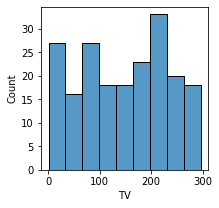

In [16]:
# check the distribution of Tv
plt.figure(figsize=(3,3))
sns.histplot(data=data,x='TV')

<AxesSubplot:xlabel='Radio', ylabel='Count'>

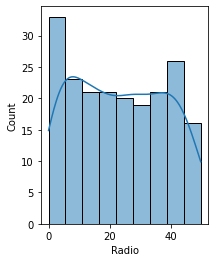

In [17]:
# distribution check of Radio
plt.figure(figsize=(3,4))
 
sns.histplot(data=data,x='Radio',kde=True,)

In [18]:
# multivariant analysis
sns.pairplot('data')

TypeError: 'data' must be pandas DataFrame object, not: <class 'str'>

In [ ]:
sns.pairplot(data)

In [ ]:
sns.scatterplot(data=data,x='TV',y='Sales',color='green',hue='TV')

In [ ]:
sns.scatterplot(data=data,x='Radio',y='Sales',hue='Radio',palette='rainbow')

<AxesSubplot:>

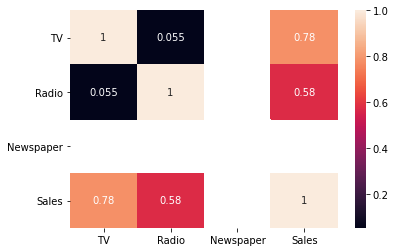

In [56]:
sns.heatmap(data.corr(),annot=True)

# 23-05-2023 

# Check outliers and 

<AxesSubplot:xlabel='Newspaper'>

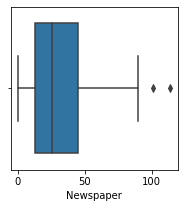

In [20]:
# check outliers in newspaper
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Newspaper',)

In [21]:
# Clearrly we can see outliers in newspaper column.
# Since distribution of newspaper is o=not normal will use IQR method to identify outliers.

# 

In [22]:
 #Create Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
Q3=data['Newspaper'].quantile(0.75)

IQR=Q3-Q1


lower_limit=Q1-1.5*IQR
upper_limit=Q3-1.5*IQR

In [23]:
# find values less than lower limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [24]:
# find the values greter than upper limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
# since distribution of news is npt normal we replace outleirs with median
data.loc[data['Newspaper']>upper_limit,'Newspaper']=data['Newspaper'].median()

In [26]:
 data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,25.75,22.1
1,44.5,39.3,25.75,10.4
2,17.2,45.9,25.75,9.3
3,151.5,41.3,25.75,18.5
4,180.8,10.8,25.75,12.9
...,...,...,...,...
195,38.2,3.7,25.75,7.6
196,94.2,4.9,25.75,9.7
197,177.0,9.3,25.75,12.8
198,283.6,42.0,25.75,25.5


Scaling

In [27]:
# import minMax Scaler
from sklearn.preprocessing import MinMaxScaler
# initilise MinMaxScaler
scaling=MinMaxScaler()
data[['TV','Radio','Newspaper']]=scaling.fit_transform(data[['TV','Radio','Newspaper']])

In [28]:
data

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.0,22.1
1,0.148123,0.792339,0.0,10.4
2,0.055800,0.925403,0.0,9.3
3,0.509976,0.832661,0.0,18.5
4,0.609063,0.217742,0.0,12.9
...,...,...,...,...
195,0.126818,0.074597,0.0,7.6
196,0.316199,0.098790,0.0,9.7
197,0.596212,0.187500,0.0,12.8
198,0.956713,0.846774,0.0,25.5


In [29]:
MinMaxScaler(data)

MinMaxScaler(feature_range=           TV     Radio  Newspaper  Sales
0    0.775786  0.762097        0.0   22.1
1    0.148123  0.792339        0.0   10.4
2    0.055800  0.925403        0.0    9.3
3    0.509976  0.832661        0.0   18.5
4    0.609063  0.217742        0.0   12.9
..        ...       ...        ...    ...
195  0.126818  0.074597        0.0    7.6
196  0.316199  0.098790        0.0    9.7
197  0.596212  0.187500        0.0   12.8
198  0.956713  0.846774        0.0   25.5
199  0.782550  0.173387        0.0   13.4

[200 rows x 4 columns])

In [30]:
# skipping converting Categorical data info numerical values.

In [31]:
#data.copy()

# Feature Engineering

In [32]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,NaN,0.782224
Radio,0.054809,1.000000,NaN,0.576223
Newspaper,NaN,NaN,NaN,NaN
Sales,0.782224,0.576223,NaN,1.000000


<AxesSubplot:>

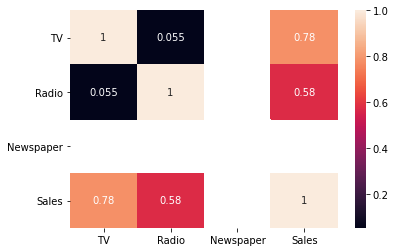

In [54]:
sns.heatmap(data.corr(),annot=True)

# 23-05-2023

<AxesSubplot:>

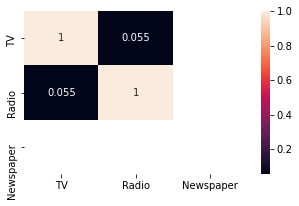

In [36]:
# no or multicollinearity
plt.figure(figsize=(5,3))
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [37]:
# splite Data ############# this is supervise ml
x=data.drop('Sales',axis=1)
y=data[['Sales']]

In [38]:
x

,TV,Radio,Newspaper
0,0.775786,0.762097,0.0
1,0.148123,0.792339,0.0
2,0.055800,0.925403,0.0
3,0.509976,0.832661,0.0
4,0.609063,0.217742,0.0
...,...,...,...
195,0.126818,0.074597,0.0
196,0.316199,0.098790,0.0
197,0.596212,0.187500,0.0
198,0.956713,0.846774,0.0


In [39]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [41]:
# splited data for training and testing
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

# ml Modelling

# Apply Linear Reg Model

In [46]:
# import linear regression model
from sklearn.linear_model import LinearRegression

# initilise model
model=LinearRegression()

# train model
model.fit(x_train,y_train)

LinearRegression()

In [47]:
# make predictions
y_pred=model.predict(x_test)

In [52]:
y_pred

array([[17.25874785],
       [16.82980841],
       [22.01483249],
       [24.57117689],
       [12.27234854],
       [21.00756667],
       [10.16284416],
       [12.31785147],
       [11.77975231],
       [17.03160318],
       [22.74529685],
       [15.27730653],
       [ 8.55075653],
       [15.00106998],
       [18.55099263],
       [18.68314404],
       [18.85362286],
       [14.41731955],
       [ 9.79138477],
       [20.62521576],
       [14.81727913],
       [17.73513185],
       [23.05639809],
       [ 7.77699909],
       [21.55588989],
       [19.42635713],
       [13.93642825],
       [11.69327188],
       [18.37911658],
       [12.36903173],
       [11.45456824],
       [10.01074719],
       [13.51439372],
       [15.18752985],
       [18.11164214],
       [ 6.93543498],
       [14.06188223],
       [14.29568411],
       [14.08255836],
       [10.74102378],
       [14.94734535],
       [11.80063751],
       [10.762993  ],
       [10.34836677],
       [ 6.20138166],
       [16

In [53]:
y_test['pred']=y_pred

In [51]:
y_test

,Sales,pred
11,17.4,17.258748
99,17.2,16.829808
128,24.7,22.014832
175,27.0,24.571177
1,10.4,12.272349
111,21.8,21.007567
90,11.2,10.162844
177,11.7,12.317851
88,12.9,11.779752
187,17.3,17.031603
